In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# reading Data

In [3]:
df=pd.read_csv("/content/drive/MyDrive/wfp_food_prices_syr.csv")
df

<ipython-input-3-b1a7211f3ee7>:1: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/wfp_food_prices_syr.csv")


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,"Bread (bakery, parallel market)",1.1 KG,actual,Retail,SYP,12.69,0.2675
2,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Maize (local),KG,actual,Retail,SYP,30.0,0.6322
3,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Potatoes,KG,actual,Retail,SYP,20.0,0.4215
4,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Rice,KG,actual,Retail,SYP,40.0,0.843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182774,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Dates,KG,aggregate,Retail,SYP,13000.0,29.7824
182775,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Eggplants,KG,aggregate,Retail,SYP,1166.67,2.6728
182776,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Onions,KG,aggregate,Retail,SYP,3400.0,7.7892
182777,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Parsley,Packet,aggregate,Retail,SYP,383.33,0.8782


#Exploring the data (Exploring Data Analysis)





In [ ]:
df.head(10)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,"Bread (bakery, parallel market)",1.1 KG,actual,Retail,SYP,12.69,0.2675
2,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Maize (local),KG,actual,Retail,SYP,30.0,0.6322
3,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Potatoes,KG,actual,Retail,SYP,20.0,0.4215
4,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Rice,KG,actual,Retail,SYP,40.0,0.843
5,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Wheat,KG,actual,Retail,SYP,30.0,0.6322
6,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Wheat flour (local),KG,actual,Retail,SYP,30.0,0.6322
7,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,"meat, fish and eggs",Meat (sheep),KG,actual,Retail,SYP,500.0,10.5374
8,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,miscellaneous food,Sugar,KG,actual,Retail,SYP,45.0,0.9484
9,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,oil and fats,Ghee (artificial),KG,actual,Retail,SYP,95.0,2.0021


In [ ]:
df.tail(10)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
182769,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,pulses and nuts,Lentils,KG,aggregate,Retail,SYP,10100.0,23.1386
182770,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Apples,KG,aggregate,Retail,SYP,1850.0,4.2383
182771,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Bananas,KG,aggregate,Retail,SYP,8700.0,19.9313
182772,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Carrots,KG,aggregate,Retail,SYP,1700.0,3.8946
182773,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Cucumbers,KG,aggregate,Retail,SYP,2300.0,5.2692
182774,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Dates,KG,aggregate,Retail,SYP,13000.0,29.7824
182775,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Eggplants,KG,aggregate,Retail,SYP,1166.67,2.6728
182776,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Onions,KG,aggregate,Retail,SYP,3400.0,7.7892
182777,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Parsley,Packet,aggregate,Retail,SYP,383.33,0.8782
182778,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Tomatoes,KG,aggregate,Retail,SYP,1400.0,3.2073


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182779 entries, 0 to 182778
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       182779 non-null  object
 1   admin1     182779 non-null  object
 2   admin2     182779 non-null  object
 3   market     182779 non-null  object
 4   latitude   182779 non-null  object
 5   longitude  182779 non-null  object
 6   category   182779 non-null  object
 7   commodity  182779 non-null  object
 8   unit       182779 non-null  object
 9   priceflag  182779 non-null  object
 10  pricetype  182779 non-null  object
 11  currency   182779 non-null  object
 12  price      182779 non-null  object
 13  usdprice   182779 non-null  object
dtypes: object(14)
memory usage: 19.5+ MB


In [ ]:
df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,182779,182779,182779,182779,182779,182779,182779,182779,182779,182779,182779,182779,182779.0,182779.0000
unique,142,15,51,98,151,152,9,79,27,4,3,2,48025.0,53190.0000
top,2021-04-15,Homs,Homs,Dar'a,33.5,41.241371154785156,non-food,Sugar,KG,aggregate,Retail,SYP,500.0,1.1455
freq,3599,20805,12749,3762,2038,1966,51631,5250,90324,114693,179561,182778,2494.0,2489.0000


In [ ]:
df.shape

(182779, 14)

In [ ]:
df.dtypes

date         object
admin1       object
admin2       object
market       object
latitude     object
longitude    object
category     object
commodity    object
unit         object
priceflag    object
pricetype    object
currency     object
price        object
usdprice     object
dtype: object

In [ ]:
df['unit'].value_counts()

KG             90324
L              17995
1.1 KG         10237
Packet          7301
25 KG           7140
Day             4566
Head            4509
160 G           4186
30 pcs          3609
USD/LCU         3365
MT              3217
Bar             2315
1 piece         2315
50 ML           2305
Pair            2284
200 ML          2245
900 ML          2201
1 GB            2199
10 pcs          2196
100 ML          2189
28 pcs          2186
1.5 L           2136
125 G            642
650 G            637
Course           448
Cubic meter       31
#item+unit         1
Name: unit, dtype: int64

In [ ]:
df['pricetype'].value_counts()

Retail              179561
Wholesale             3217
#item+price+type         1
Name: pricetype, dtype: int64

In [ ]:
df['commodity'].value_counts()

Sugar                  5250
Oil                    5242
Lentils                5126
Rice                   5079
Bulgur                 5038
                       ... 
Onions (dry, local)      28
Maize (local)             9
Chili (green)             9
Beans (red)               9
#item+name                1
Name: commodity, Length: 79, dtype: int64

In [ ]:

df.count()

date         182779
admin1       182779
admin2       182779
market       182779
latitude     182779
longitude    182779
category     182779
commodity    182779
unit         182779
priceflag    182779
pricetype    182779
currency     182779
price        182779
usdprice     182779
dtype: int64

In [ ]:
df['admin1'].unique()

array(['#adm1+name', 'Aleppo', 'Damascus', 'Homs', 'Lattakia',
       'Rural Damascus', 'Tartous', 'Al-Hasakeh', "Dar'a", 'Ar-Raqqa',
       'As-Sweida', 'Deir-ez-Zor', 'Hama', 'Idleb', 'Quneitra'],
      dtype=object)

In [ ]:
df['market'].unique()

array(['#loc+market+name', 'Aleppo', 'Al Bab', 'Menbij', 'Zablatani',
       'Homs', 'Hiffeh', 'Jablah', 'Lattakia', 'Hajar Aswad', 'Jaramana',
       'Qudsiya', 'Banias', 'Safita', 'Tartous', 'Quamishli',
       "Sheikh Sa'ad", "Dar'a", 'Moghambo', 'Damascus', 'Al-Hasakeh',
       "Al-Cha'ar", 'Ar-Raqqa', 'Tell Abiad', 'As-Sweida', 'Shahba',
       'Shrebishat', 'Mzeireb', 'Al Mayadin', 'Deir-ez-Zor', 'Hama',
       'Masyaf', 'Ekrema', 'Qaryatein', 'Bennsh', 'Idleb', 'Khan Arnaba',
       'Rafid', 'At-Tall', 'Rural Safita', 'Nubul', 'Eastern Ghouta',
       "A'zaz", 'Ar-Rastan', 'Talbiseh', 'Al Waer', 'Hula', 'Inshaat',
       'Jandar', 'Afrin', 'As-Salamiyeh', 'Al Malaab', "Dar'a (XB)",
       'Hrak', "Izr'a", 'Al Fiq', 'Jizeh', 'Sayda', 'Der Hafir',
       'As-Safira', 'Atareb', 'Al Tabqah', 'Al Balad', 'Al Midan', 'Nawa',
       'As-Suqaylabiyah', 'Muhradah', 'Al Makhrim', 'Hawash', 'Duma',
       'Ein Terma', 'Kisweh', 'Saqba', 'Al Hamdaneya', 'Al Kom',
       'Ein Issa', 'Maskana

# Finding missing values & data processing

In [ ]:
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [ ]:
df.isnull()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182774,False,False,False,False,False,False,False,False,False,False,False,False,False,False
182775,False,False,False,False,False,False,False,False,False,False,False,False,False,False
182776,False,False,False,False,False,False,False,False,False,False,False,False,False,False
182777,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.drop([0], axis=0, inplace=True)

In [ ]:
df.isna().any().sum()



0

In [ ]:
df=df.dropna()
df.reset_index(drop=True,inplace=True)
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,"Bread (bakery, parallel market)",1.1 KG,actual,Retail,SYP,12.69,0.2675
1,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Maize (local),KG,actual,Retail,SYP,30.0,0.6322
2,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Potatoes,KG,actual,Retail,SYP,20.0,0.4215
3,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Rice,KG,actual,Retail,SYP,40.0,0.843
4,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Wheat,KG,actual,Retail,SYP,30.0,0.6322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182773,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Dates,KG,aggregate,Retail,SYP,13000.0,29.7824
182774,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Eggplants,KG,aggregate,Retail,SYP,1166.67,2.6728
182775,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Onions,KG,aggregate,Retail,SYP,3400.0,7.7892
182776,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Parsley,Packet,aggregate,Retail,SYP,383.33,0.8782


# Finding duplicates

In [ ]:
#Our data has no Duplicates as it returns false
data = df.drop_duplicates()
df.duplicated().values.any()

False

In [5]:
columns = ['priceflag','currency','usdprice']
df = df.drop(columns=columns)

In [ ]:

df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,price
1,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,"Bread (bakery, parallel market)",1.1 KG,Retail,12.69
2,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Maize (local),KG,Retail,30.0
3,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Potatoes,KG,Retail,20.0
4,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Rice,KG,Retail,40.0
5,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Wheat,KG,Retail,30.0
...,...,...,...,...,...,...,...,...,...,...,...
182774,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Dates,KG,Retail,13000.0
182775,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Eggplants,KG,Retail,1166.67
182776,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Onions,KG,Retail,3400.0
182777,2023-01-15,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Parsley,Packet,Retail,383.33


In [6]:
size=len(df['date'])
year=np.zeros((size,1))
month=np.zeros((size,1))
i=0
for date in df['date']:
    date1=date.split('-')
    year[i]=date1[0]
    month[i]=date1[1]
    i+=1
df['year']=year.astype(int)
df['month']=month.astype(int)
df=df.drop(labels='date',axis=1)
df


,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,price,year,month
1,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,"Bread (bakery, parallel market)",1.1 KG,Retail,12.69,2011,4
2,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Maize (local),KG,Retail,30.0,2011,4
3,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Potatoes,KG,Retail,20.0,2011,4
4,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Rice,KG,Retail,40.0,2011,4
5,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Wheat,KG,Retail,30.0,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...
182774,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Dates,KG,Retail,13000.0,2023,1
182775,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Eggplants,KG,Retail,1166.67,2023,1
182776,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Onions,KG,Retail,3400.0,2023,1
182777,Tartous,Tartous,Tartous,34.890017,35.889063,vegetables and fruits,Parsley,Packet,Retail,383.33,2023,1


In [7]:
df['price'] = pd.to_numeric(df['price'])
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])
print(df.dtypes)


admin1        object
admin2        object
market        object
latitude     float64
longitude    float64
category      object
commodity     object
unit          object
pricetype     object
price        float64
year           int64
month          int64
dtype: object


# Data Visualization

<Axes: xlabel='category', ylabel='price'>

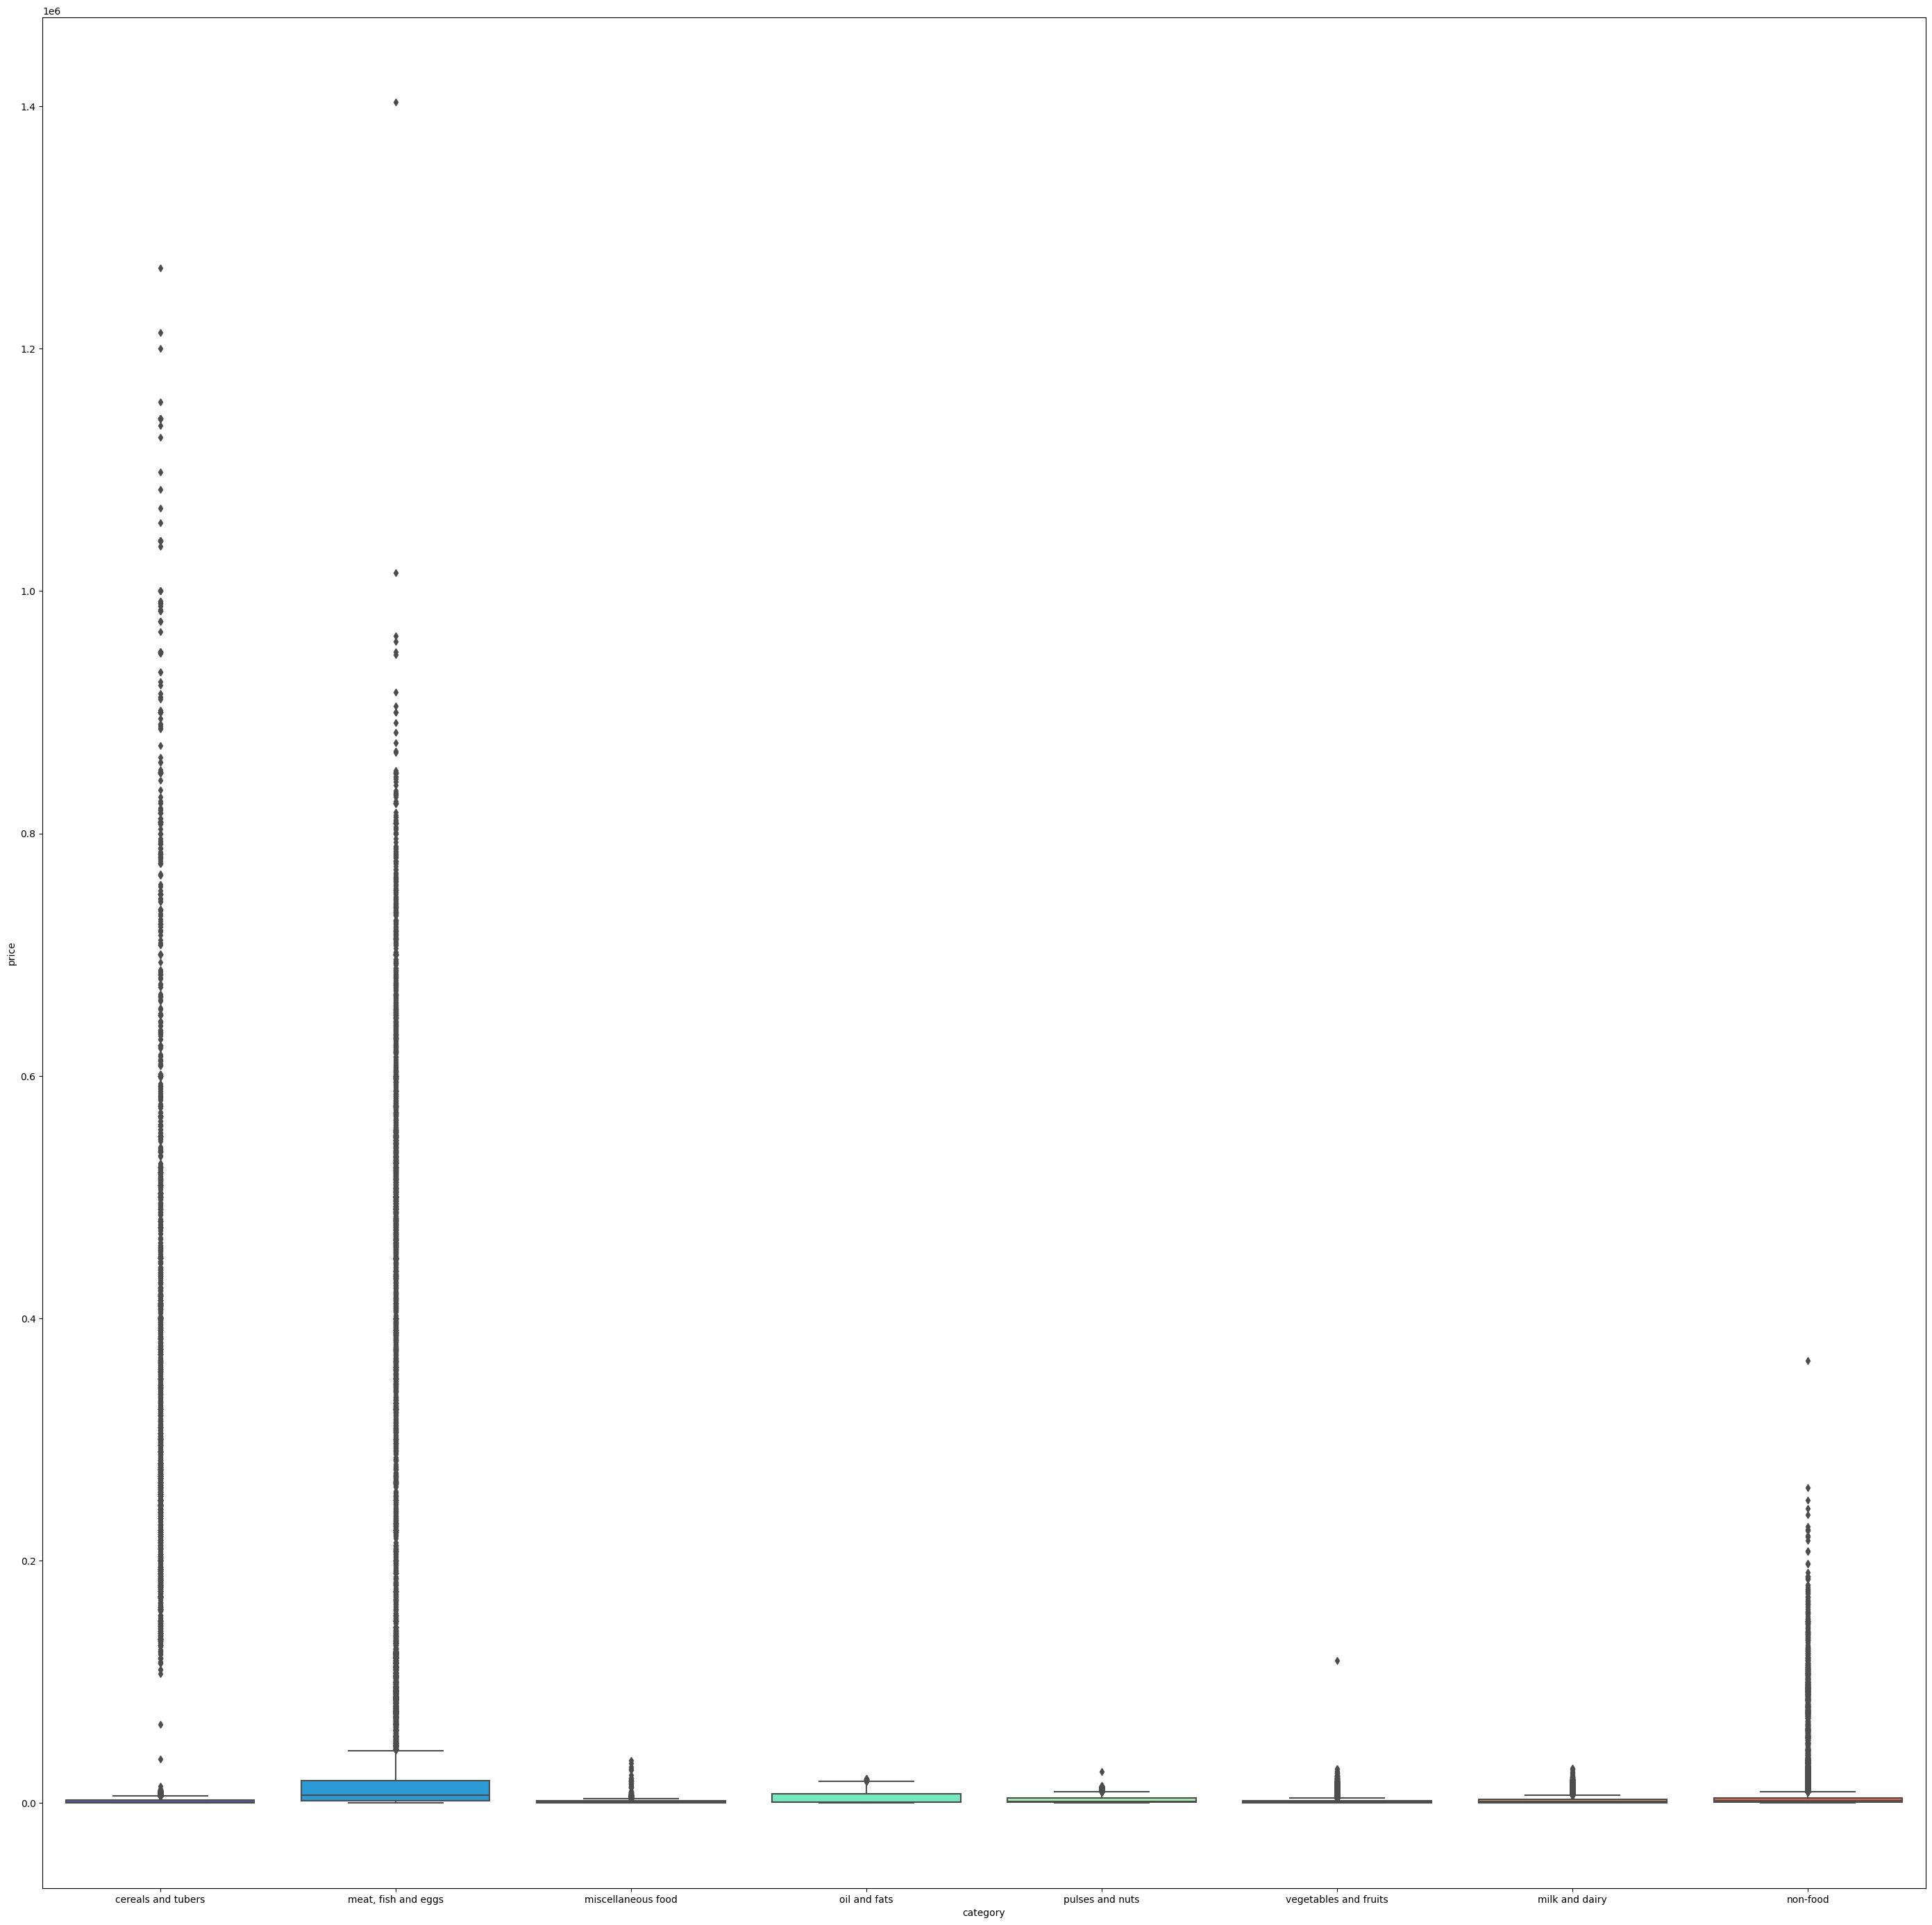

In [ ]:
plt.figure(figsize=(35,35))
sns.boxplot(x="category", y="price", data=df,palette='rainbow')

<Axes: xlabel='price', ylabel='Count'>

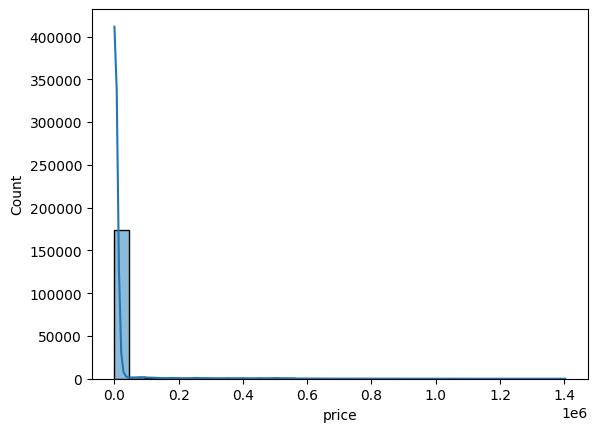

In [ ]:
sns.histplot(df['price'].dropna(),kde=True,bins=30)

count    182778.000000
mean         37.138081
std           1.501324
min          35.783333
25%          36.257259
50%          36.580929
75%          37.181478
max          41.956307
Name: longitude, dtype: float64

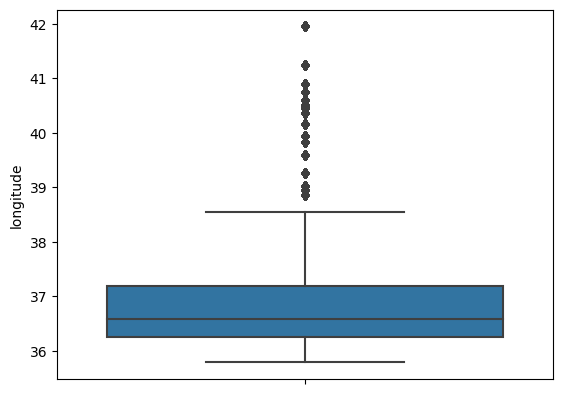

In [ ]:
sns.boxplot(data=df,y='longitude')
df['longitude'].describe()

count    182778.000000
mean         37.138081
std           1.501324
min          35.783333
25%          36.257259
50%          36.580929
75%          37.181478
max          41.956307
Name: longitude, dtype: float64

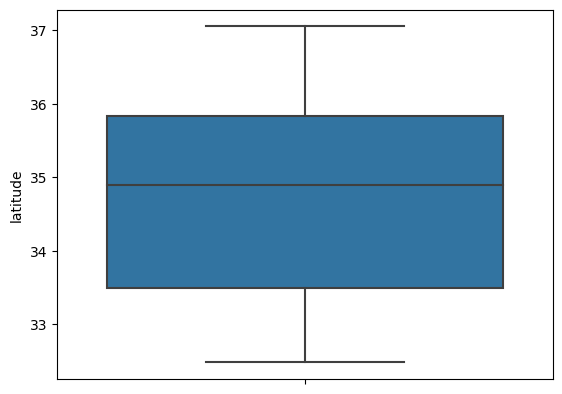

In [ ]:
# there is no outlier on the latitude
sns.boxplot(data=df,y='latitude')
df['longitude'].describe()

there are outliers on the longitude column since we know that longitude of syria is from :
53.79011 to 40.91854

<Axes: ylabel='longitude'>

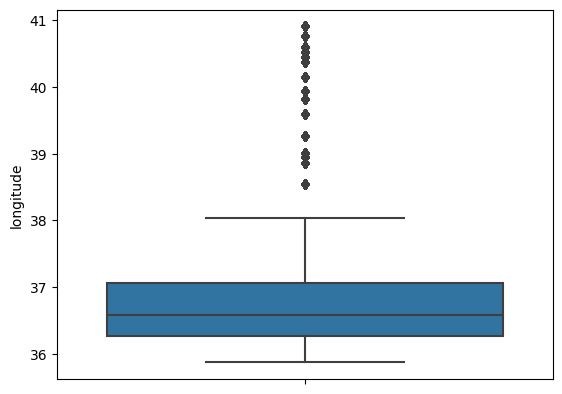

In [8]:
df = df.drop(df[(df['longitude'] > 40.91854) | (df['longitude'] < 35.79011)].index)
sns.boxplot(data=df,y='longitude')

In [ ]:
df.groupby('category')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
cereals and tubers,33913.0,33029.748853,116374.800614,5.08,200.000,600.000,2459.1400,1266666.67
"meat, fish and eggs",21286.0,67428.171557,159068.038924,150.00,1923.375,6217.225,18465.7400,1403333.51
milk and dairy,9210.0,2762.152174,3937.575111,100.00,325.000,1250.000,2765.3775,27533.33
miscellaneous food,10991.0,1262.819094,1716.328595,6.00,238.000,600.000,1666.1450,35000.00
non-food,49365.0,5413.138718,15005.191709,35.00,675.000,2000.000,4113.4700,365053.81
oil and fats,4994.0,4161.877091,4979.623942,80.00,596.250,1000.000,7545.0725,20000.00
pulses and nuts,13653.0,2504.096573,2766.344092,10.00,500.000,1100.000,3977.4200,25850.00
vegetables and fruits,30738.0,1576.197721,2441.600957,13.00,284.460,848.390,1708.5325,117585.56


In [14]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [15]:
df_outlier_removed1=remove_outlier_IQR(df.loc[(df['category'] =='cereals and tubers'),'price'])
df_outlier_removed1=pd.DataFrame(df_outlier_removed1)

df_outlier_removed1=pd.DataFrame(df_outlier_removed1)
df_outlier_removed1


,price
1,12.69
2,30.00
3,20.00
4,40.00
5,30.00
...,...
182729,300.00
182730,3500.00
182732,1533.33
182734,2400.00


In [16]:
df_outlier_removed2=remove_outlier_IQR(df.loc[(df['category'] =='meat, fish and eggs'),'price'])

df_outlier_removed3=remove_outlier_IQR(df.loc[(df['category'] =='milk and dairy'),'price'])

df_outlier_removed4=remove_outlier_IQR(df.loc[(df['category'] =='miscellaneous food'),'price'])

df_outlier_removed5=remove_outlier_IQR(df.loc[(df['category'] =='non-food'),'price'])

df_outlier_removed6=remove_outlier_IQR(df.loc[(df['category'] =='pulses and nuts'),'price'])

df_outlier_removed7=remove_outlier_IQR(df.loc[(df['category'] =='vegetables and fruits'),'price'])
df_outlier_removed8=remove_outlier_IQR(df.loc[(df['category'] =='oil and fats'),'price'])

In [17]:
df_outlier_removed2=pd.DataFrame(df_outlier_removed2)
df_outlier_removed2

,price
7,500.0
27,550.0
46,400.0
66,400.0
86,460.0
...,...
182736,18500.0
182737,6800.0
182739,36500.0
182740,14000.0


In [18]:
df_outlier_removed3=pd.DataFrame(df_outlier_removed3)
df_outlier_removed3.describe()
#df_outlier_removed3=pd.DataFrame(df_outlier_removed3)

,price
count,7963.000000
mean,1383.330350
std,1387.812864
min,100.000000
25%,300.000000
50%,1022.580000
75%,1800.000000
max,6424.350000


In [19]:

df_outlier_removed4=pd.DataFrame(df_outlier_removed4)
df_outlier_removed4.describe()

#df_outlier_removed4=pd.DataFrame(df_outlier_removed4)

,price
count,10125.000000
mean,914.984232
std,955.272477
min,6.000000
25%,200.000000
50%,500.000000
75%,1296.770000
max,3807.780000


In [20]:
df_outlier_removed5=pd.DataFrame(df_outlier_removed5)
df_outlier_removed5.describe()
#df_outlier_removed5=pd.DataFrame(df_outlier_removed5)

,price
count,44026.000000
mean,2265.614637
std,2036.469970
min,35.000000
25%,552.500000
50%,1646.770000
75%,3187.475000
max,9266.670000


In [21]:
df_outlier_removed6=pd.DataFrame(df_outlier_removed6)
df_outlier_removed6.describe()
df_outlier_removed6=pd.DataFrame(df_outlier_removed6)

In [22]:
df_outlier_removed7=pd.DataFrame(df_outlier_removed7)
#df_outlier_removed7.describe()
df_outlier_removed8=pd.DataFrame(df_outlier_removed8)
df_outlier_removed8.describe()

,price
count,4964.000000
mean,4073.075651
std,4861.225129
min,80.000000
25%,592.750000
50%,942.000000
75%,7508.397500
max,17963.690000


In [23]:
frames = [df_outlier_removed1,df_outlier_removed2,df_outlier_removed3,df_outlier_removed4,df_outlier_removed5,df_outlier_removed6,df_outlier_removed7,df_outlier_removed8]

In [24]:
df_outlier_removed= pd.concat(frames)


In [25]:
df_outlier_removed

,price
1,12.69
2,30.00
3,20.00
4,40.00
5,30.00
...,...
182416,17600.00
182466,17733.33
182516,17333.33
182566,17500.00


Text(0, 0.5, 'Price ')

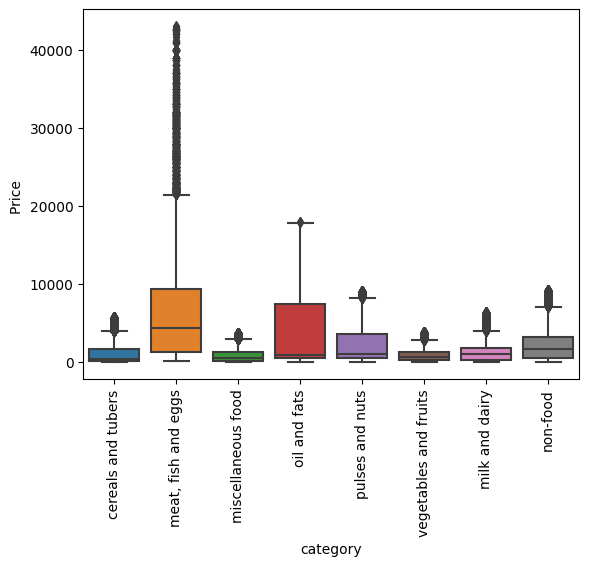

In [26]:
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
sns.boxplot(y='price', x='category',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ')

Text(0, 0.5, 'Price ')

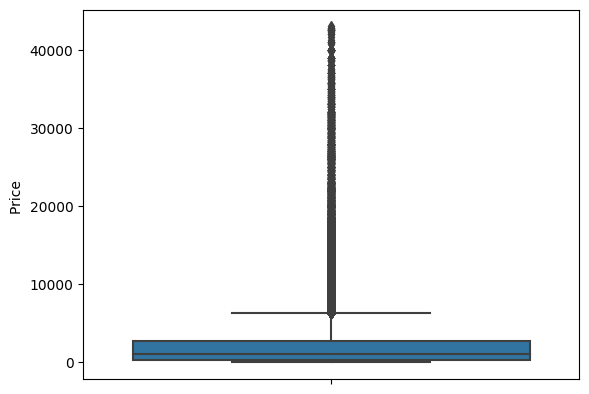

In [27]:
sns.boxplot(y='price',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ')

<Axes: xlabel='price', ylabel='category'>

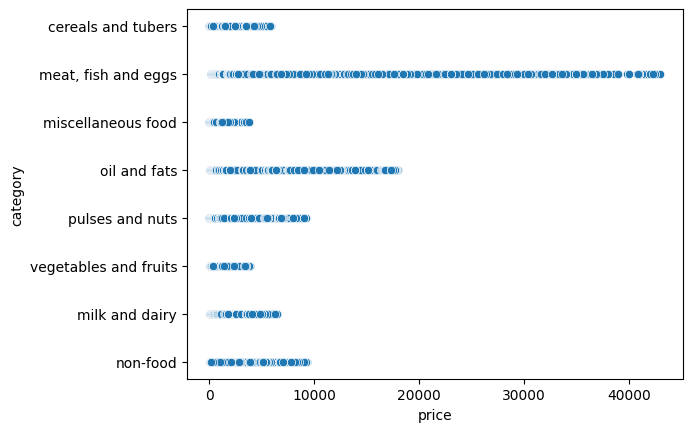

In [ ]:
sns.scatterplot(data=df, x="price",y='category')

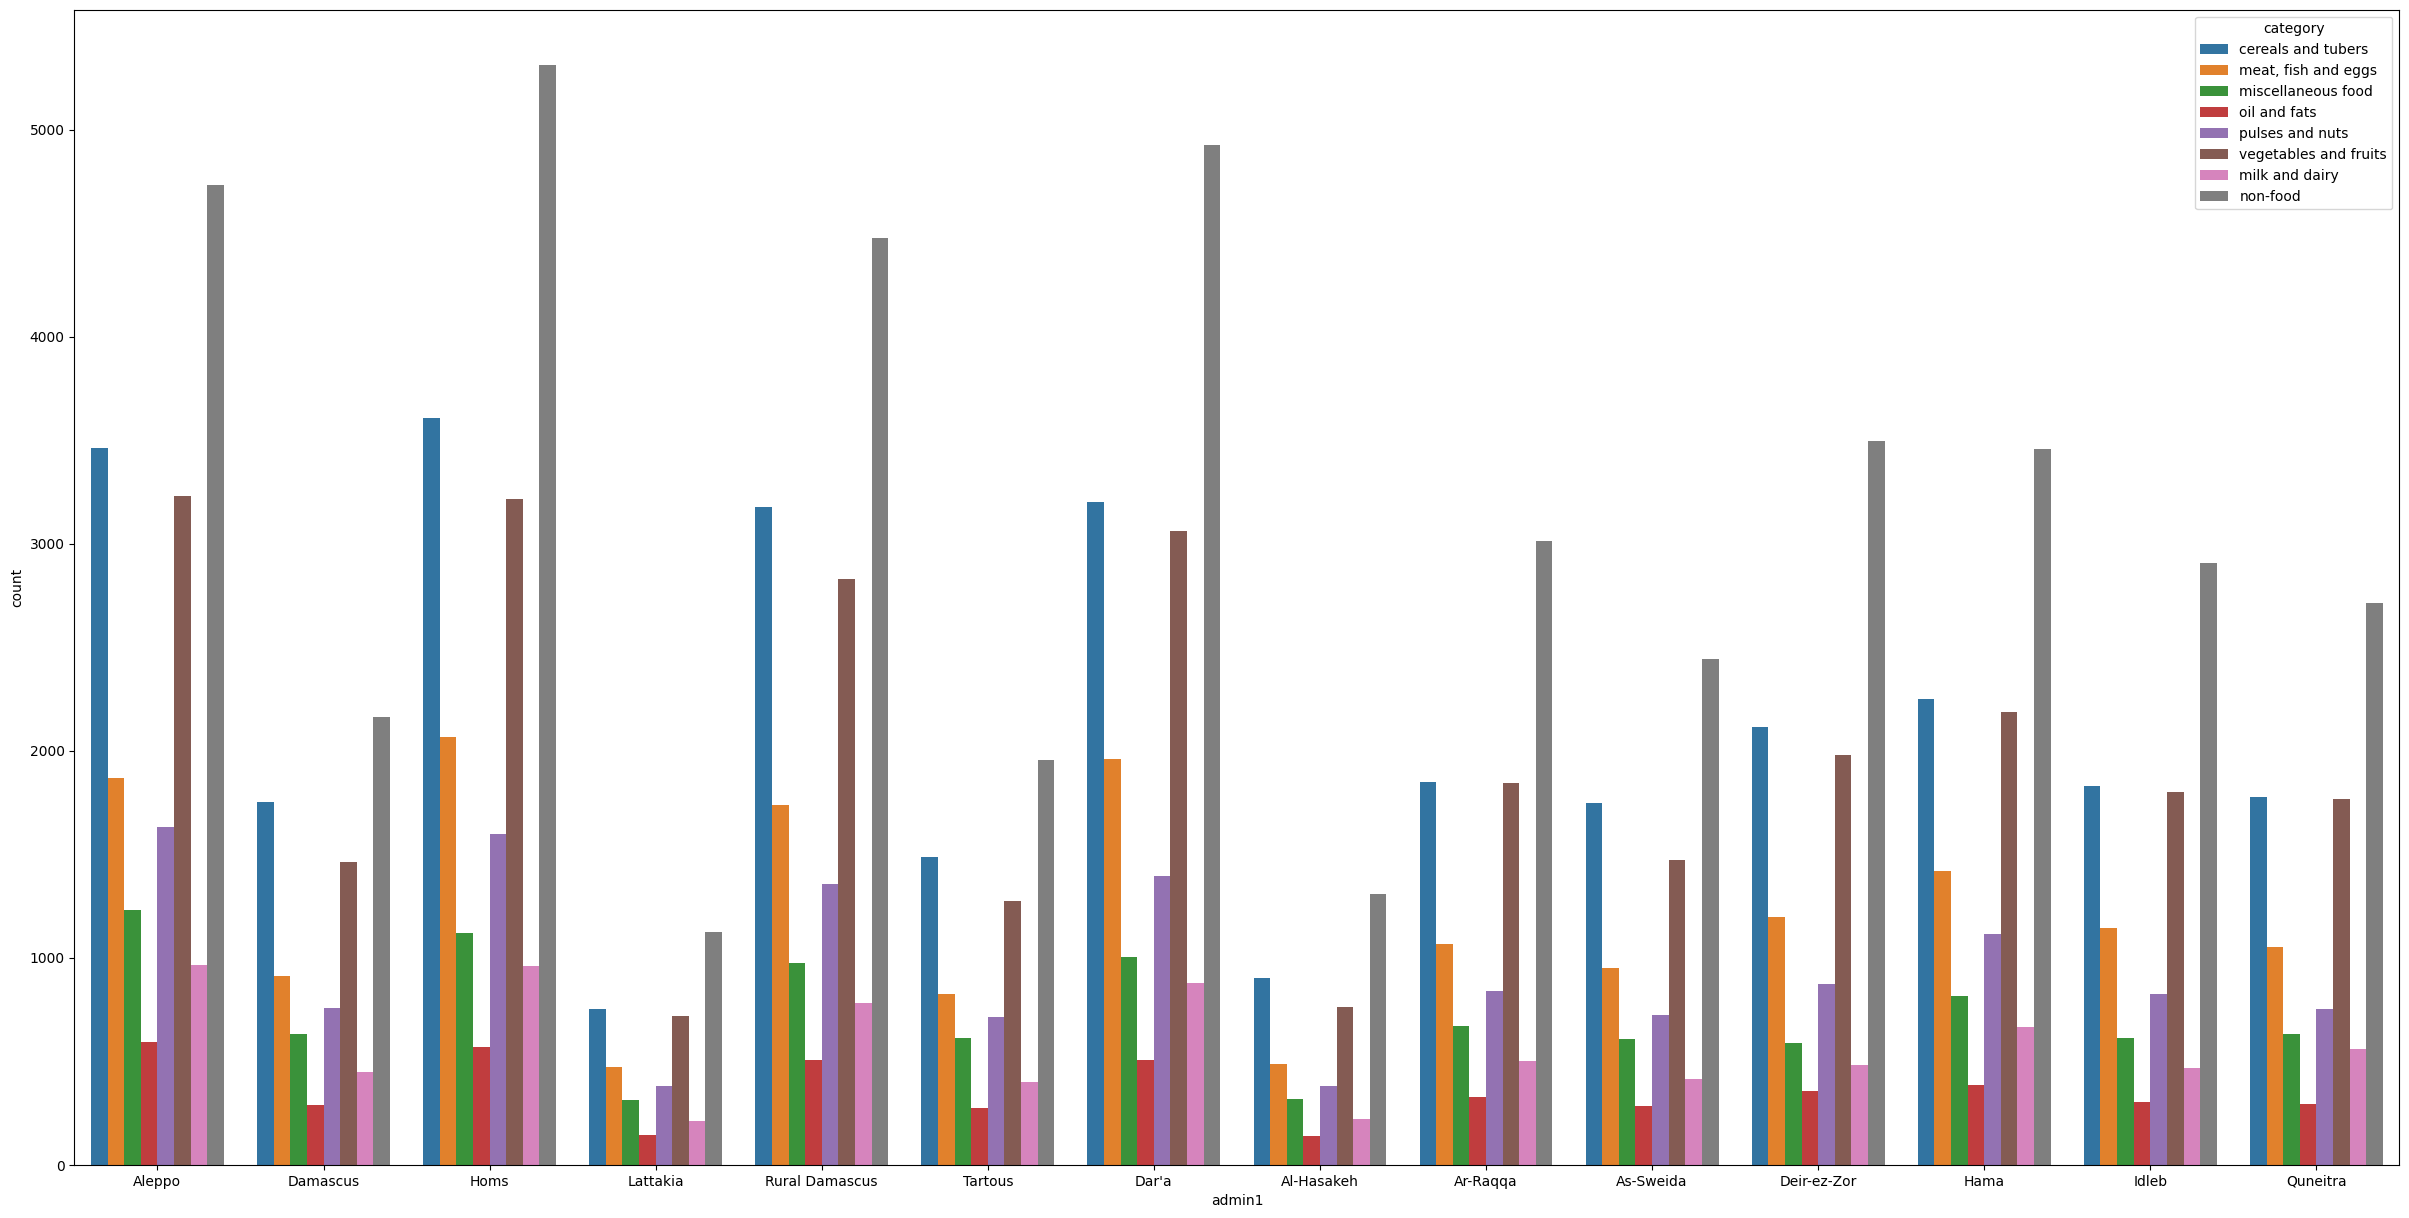

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(x='admin1',hue='category',data=df)
plt.show()

In [63]:
df.groupby(['category','admin1'])['price'].describe()

count         mean          std  \
category              admin1                                             
cereals and tubers    Al-Hasakeh       900.0   926.857738   995.863536   
                      Aleppo          3462.0   883.025607   960.658915   
                      Ar-Raqqa        1847.0   934.808358   963.819549   
                      As-Sweida       1746.0   980.401843  1070.616305   
                      Damascus        1750.0   806.286347   956.316666   
...                                      ...          ...          ...   
vegetables and fruits Idleb           1798.0  1029.772525   745.250678   
                      Lattakia         720.0   865.225919   651.201086   
                      Quneitra        1767.0   778.970513   650.865534   
                      Rural Damascus  2830.0   867.528786   683.036882   
                      Tartous         1275.0   813.029935   654.639707   

                                         min       25%      50%        75%  \
category              admin1                                                 
cereals and tubers    Al-Hasakeh       50.77  127.0000  408.000  1504.9425   
                      Aleppo           50.77  173.5950  400.000  1427.9125   
                      Ar-Raqqa         50.77  139.5300  483.330  1609.3000   
                      As-Sweida        50.77  101.0625  325.000  2014.5125   
                      Damascus         50.77  100.0000  308.330  1262.5275   
...                                      ...       ...      ...        ...   
vegetables and fruits Idleb           104.84  375.0000  826.040  1728.4900   
                      Lattakia        104.84  300.0000  773.705  1374.5075   
                      Quneitra        104.84  200.0000  634.000  1100.0000   
                      Rural Damascus  104.84  266.6700  734.675  1286.7350   
                      Tartous         104.84  234.9950  675.000  1280.1500   

                                           max  
category              admin1                    
cereals and tubers    Al-Hasakeh      2921.948  
                      Aleppo          2921.948  
                      Ar-Raqqa        2921.948  
                      As-Sweida       2921.948  
                      Damascus        2921.948  
...                                        ...  
vegetables and fruits Idleb           2201.037  
                      Lattakia        2201.037  
                      Quneitra        2201.037  
                      Rural Damascus  2201.037  
                      Tartous         2201.037  

[112 rows x 8 columns]

<AxesSubplot:xlabel='year', ylabel='month'>

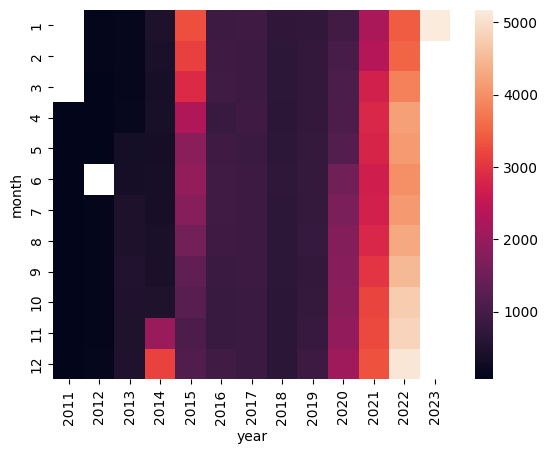

In [ ]:
df_flights = df.pivot_table(values='price',index='month',columns='year')
sns.heatmap(df_flights)
#there are an empty cells because we dont have the price in month 1,2,3 in 2011 and month 1 in 2023

<AxesSubplot:xlabel='year'>

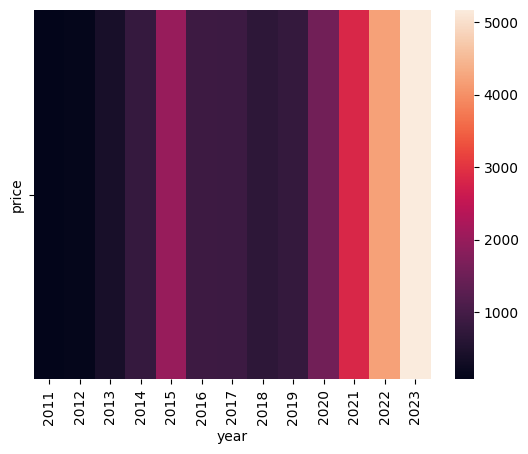

In [ ]:
df_flights = df.pivot_table(values='price',columns='year')
sns.heatmap(df_flights)

<Figure size 3000x1500 with 0 Axes>

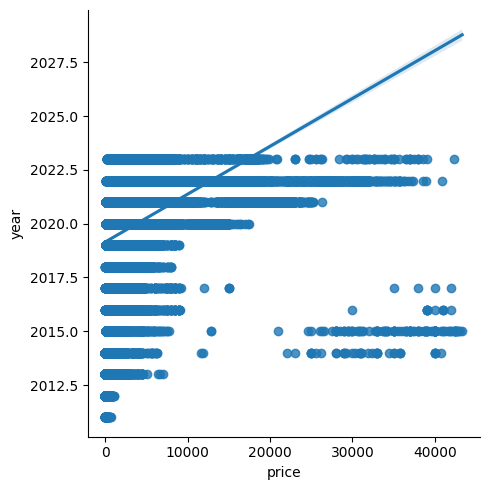

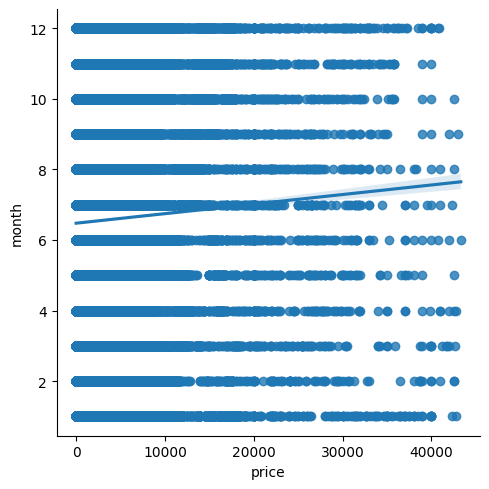

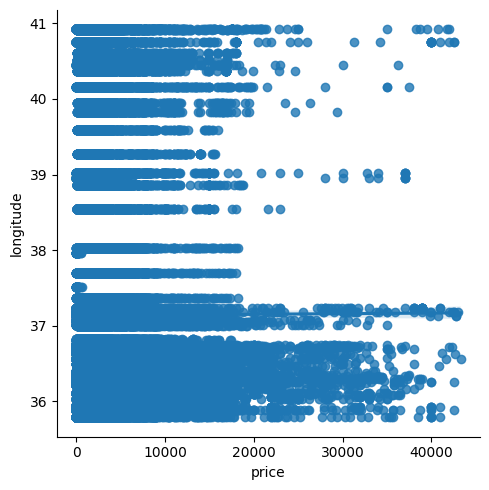

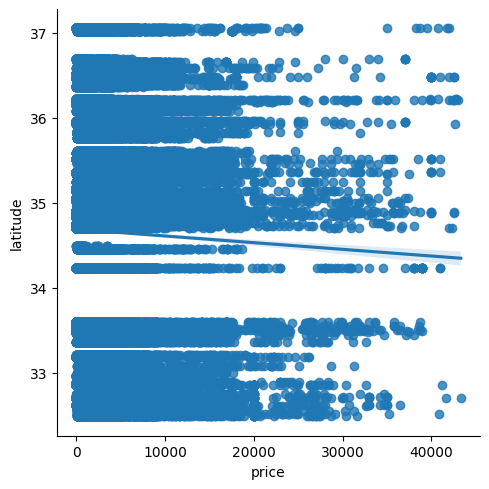

In [ ]:
plt.figure(figsize=(30,15))
sns.lmplot(x='price',y='year',data=df)
sns.lmplot(x='price',y='month',data=df)
sns.lmplot(x='price',y='longitude',data=df)
sns.lmplot(x='price',y='latitude',data=df)
plt.show()

In [ ]:
df.loc[(df['category'] =='non-food'),'price'].describe()

count    44026.000000
mean      2265.614637
std       2036.469970
min         35.000000
25%        552.500000
50%       1646.770000
75%       3187.475000
max       9266.670000
Name: price, dtype: float64

In [28]:
df.loc[(df['category'] =='meat, fish and eggs'),'price'].quantile(0.10)
df.loc[(df['category'] =='meat, fish and eggs'),'price'].quantile(0.90)

16000.0

In [29]:
df['price'] = np.where((df['price'] >= 16000.0) & (df['category'] == 'meat, fish and eggs'), 16000.0, df['price'])

df['price']=np.where((df['price'] <= 389.19) & (df['category'] == 'meat, fish and eggs'),389.19, df['price'])


In [30]:
df.loc[(df['category'] =='milk and dairy'),'price'].quantile(0.90)
df.loc[(df['category'] =='milk and dairy'),'price'].quantile(0.10)

228.0

In [31]:
df['price'] = np.where((df['price'] >= 3313.531) & (df['category'] == 'milk and dairy'), 3313.531, df['price'])
df['price'] = np.where((df['price'] <= 228.0) & (df['category'] == 'milk and dairy'), 228.0, df['price'])

In [32]:

print(df.loc[(df['category'] =='cereals and tubers'),'price'].quantile(0.90))
print(df.loc[(df['category'] =='cereals and tubers'),'price'].quantile(0.10))

2921.9479999999994
50.77


In [33]:
df['price'] = np.where((df['price'] >= 2921.9479999999994) & (df['category'] == 'cereals and tubers'),2921.9479999999994, df['price'])
df['price'] = np.where((df['price'] <= 50.77) & (df['category'] == 'cereals and tubers'),50.77, df['price'])

In [34]:
print(df.loc[(df['category'] =='miscellaneous food'),'price'].quantile(0.90))
print(df.loc[(df['category'] =='miscellaneous food'),'price'].quantile(0.10))

2550.5820000000003
110.0


In [35]:

df['price'] = np.where((df['price'] >= 2550.5820000000003) & (df['category'] == 'miscellaneous food'),2550.5820000000003, df['price'])
df['price'] = np.where((df['price'] <= 110.0) & (df['category'] == 'miscellaneous food'), 110.0, df['price'])

In [36]:
print(df.loc[(df['category'] =='oil and fats'),'price'].quantile(0.90))
print(df.loc[(df['category'] =='oil and fats'),'price'].quantile(0.10))

12237.236999999996
288.0


In [37]:
df['price'] = np.where((df['price'] >= 12237.236999999996) & (df['category'] == 'oil and fats'),12237.236999999996, df['price'])
df['price'] = np.where((df['price'] <= 288.0) & (df['category'] == 'oil and fats'),288.0, df['price'])

In [38]:
print(df.loc[(df['category'] =='pulses and nuts'),'price'].quantile(0.90))
print(df.loc[(df['category'] =='pulses and nuts'),'price'].quantile(0.10))

6566.740000000001
311.3000000000002


In [39]:
df['price'] = np.where((df['price'] >= 6566.740000000001) & (df['category'] == 'pulses and nuts'),6566.740000000001, df['price'])
df['price'] = np.where((df['price'] <= 311.3000000000002) & (df['category'] == 'pulses and nuts'),311.3000000000002, df['price'])

In [40]:
print(df.loc[(df['category'] =='vegetables and fruits'),'price'].quantile(0.90))
print(df.loc[(df['category'] =='vegetables and fruits'),'price'].quantile(0.10))

2201.036999999999
104.84


In [41]:
df['price'] = np.where((df['price'] >= 2201.036999999999) & (df['category'] == 'vegetables and fruits'),2201.036999999999, df['price'])
df['price'] = np.where((df['price'] <= 104.84) & (df['category'] == 'vegetables and fruits'),104.84, df['price'])

In [42]:
print(df.loc[(df['category'] =='non-food'),'price'].quantile(0.90))
print(df.loc[(df['category'] =='non-food'),'price'].quantile(0.10))

5200.0
300.0


In [43]:
df['price'] = np.where((df['price'] >= 5200.0) & (df['category'] == 'non-food'),5200.0, df['price'])
df['price'] = np.where((df['price'] <= 300.0) & (df['category'] == 'non-food'),300.0, df['price'])

Text(0, 0.5, 'Price ')

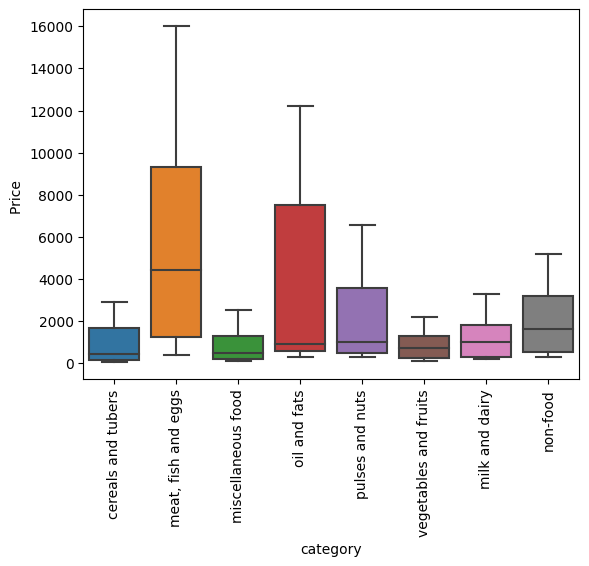

In [44]:
sns.boxplot(y='price', x='category',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ')

Text(0, 0.5, 'Price ')

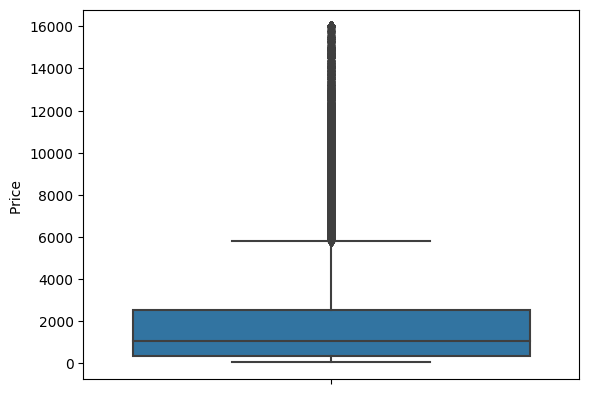

In [45]:
sns.boxplot(y='price',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ')

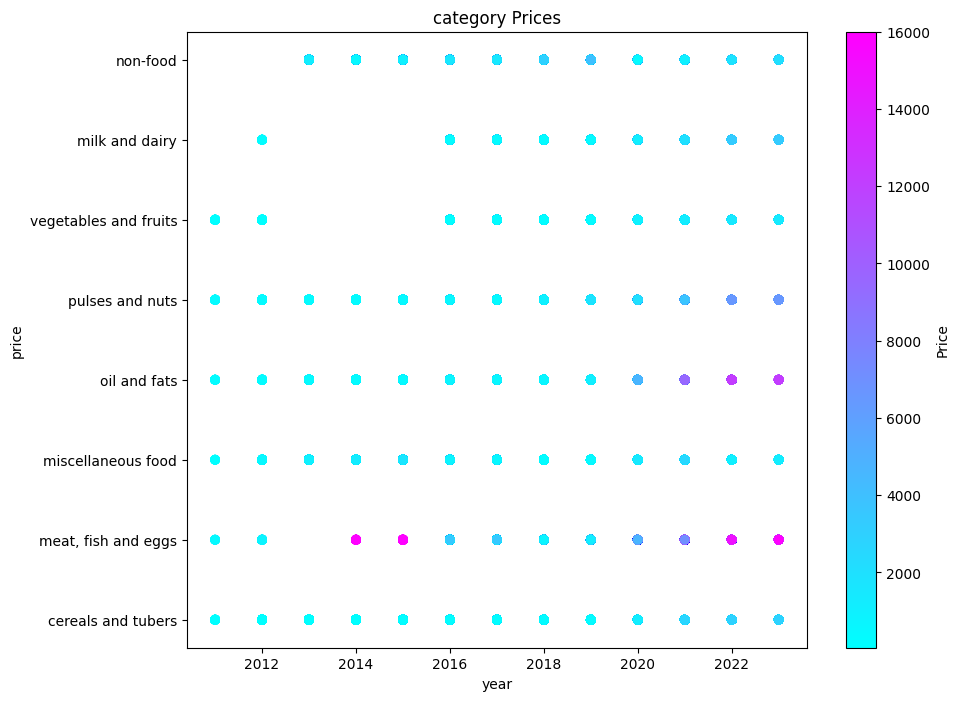

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df['year'],df['category'],c=df['price'], cmap='cool')
plt.colorbar().set_label("Price")
plt.title('category Prices')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

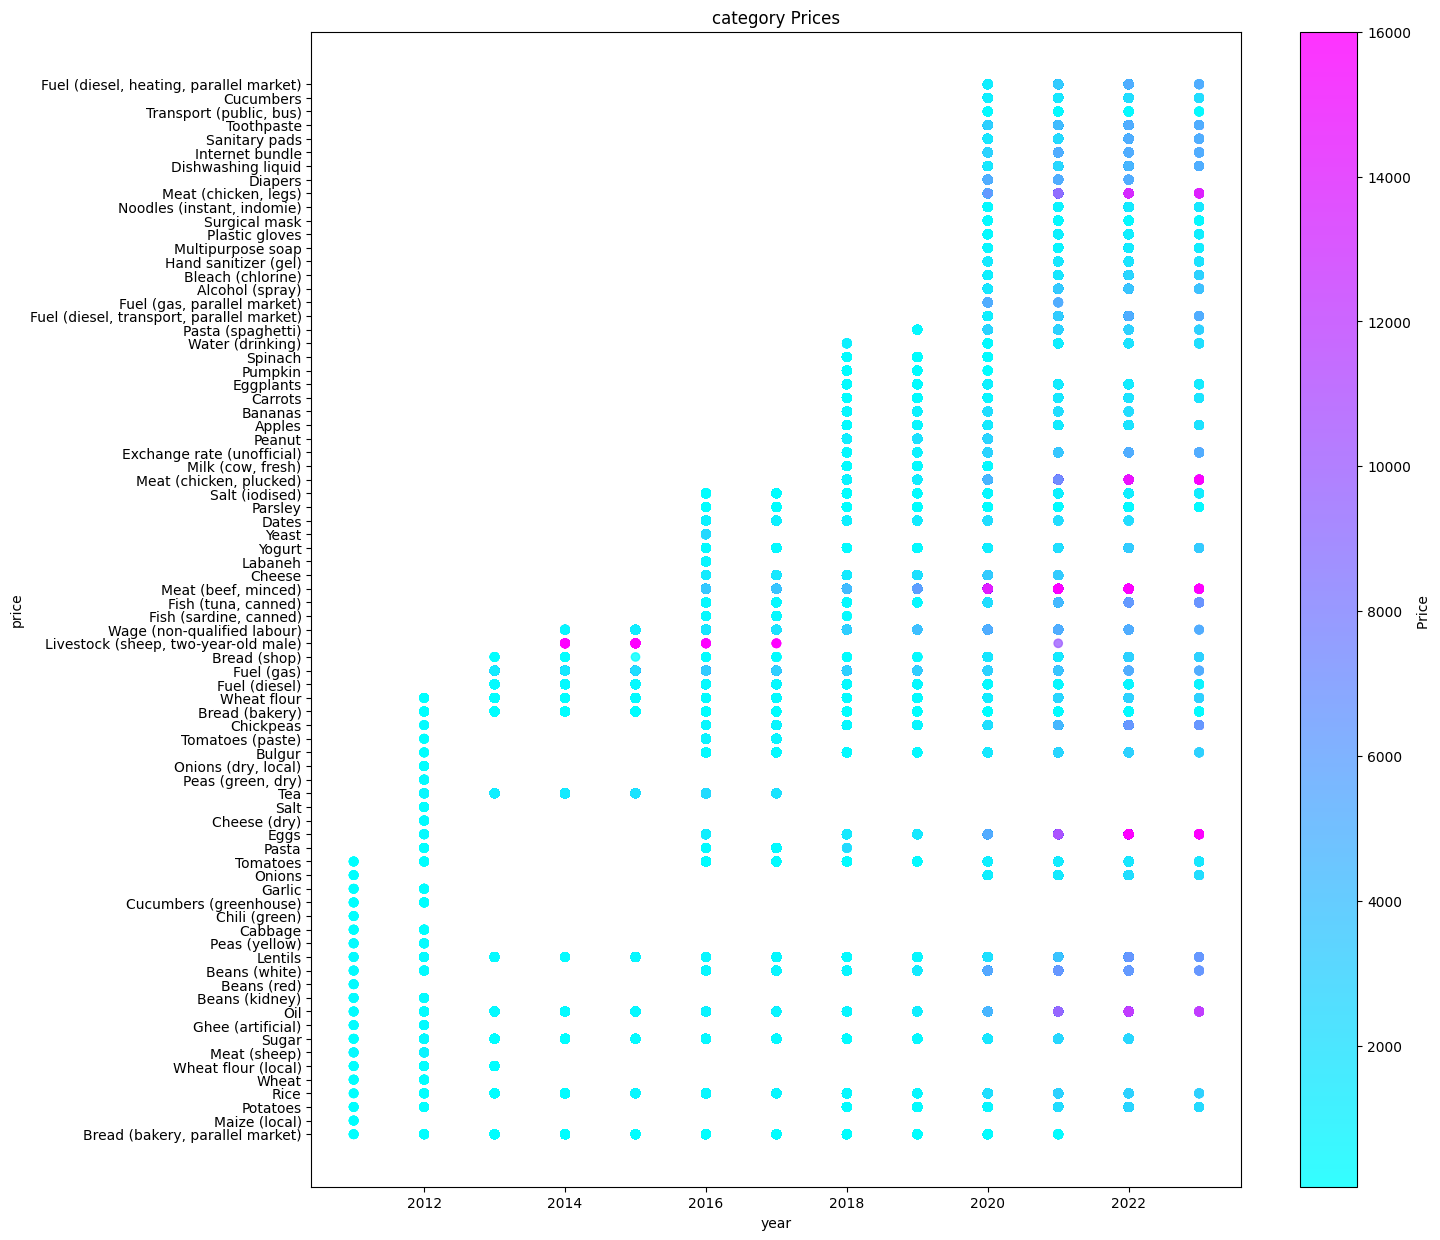

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(df['year'],df['commodity'],c=df['price'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Price ")
plt.title('category Prices')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

<Figure size 3500x3500 with 0 Axes>

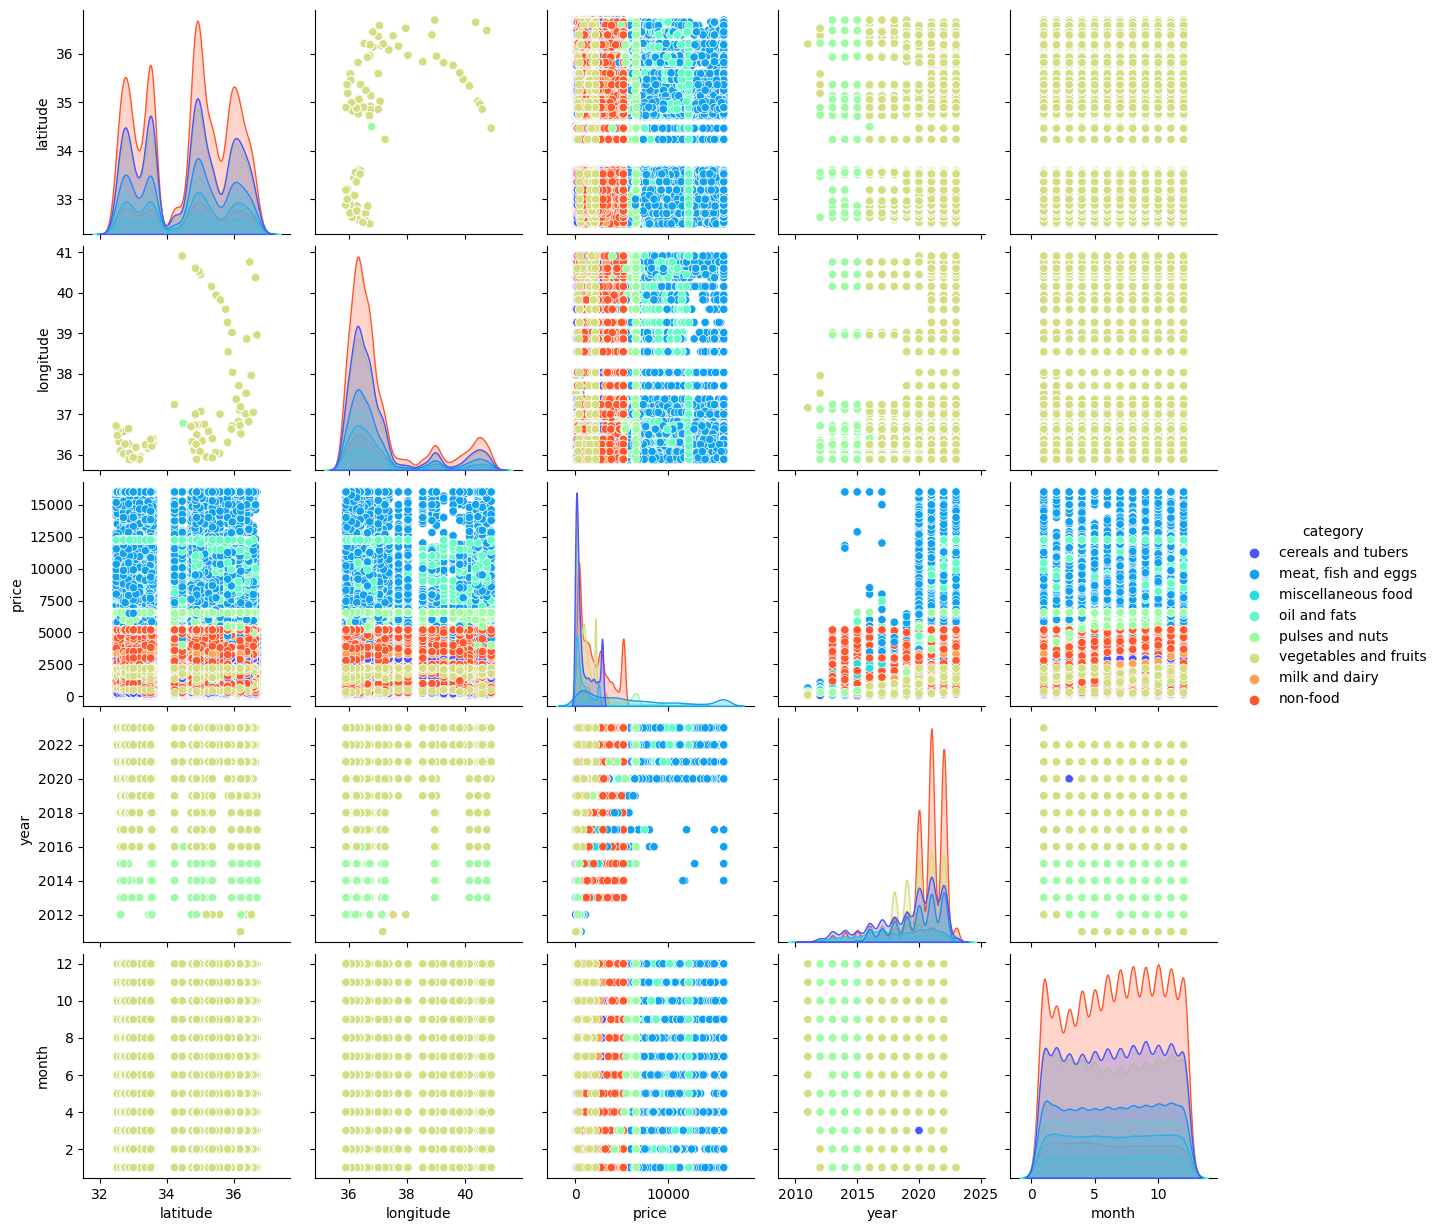

In [ ]:
plt.figure(figsize=(35,35))
sns.pairplot(df,palette='rainbow',hue="category")

<Axes: xlabel='price', ylabel='Count'>

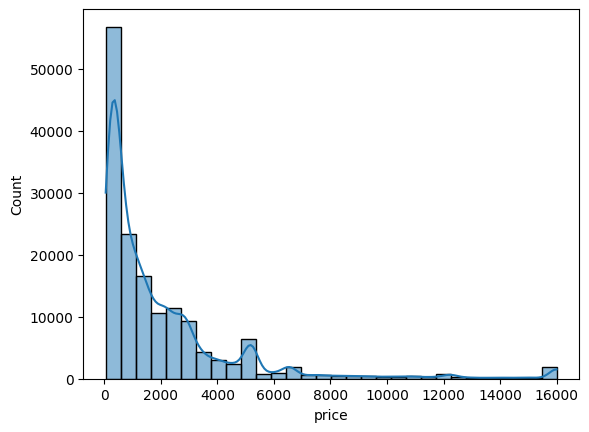

In [ ]:

sns.histplot(df['price'].dropna(),kde=True,bins=30)


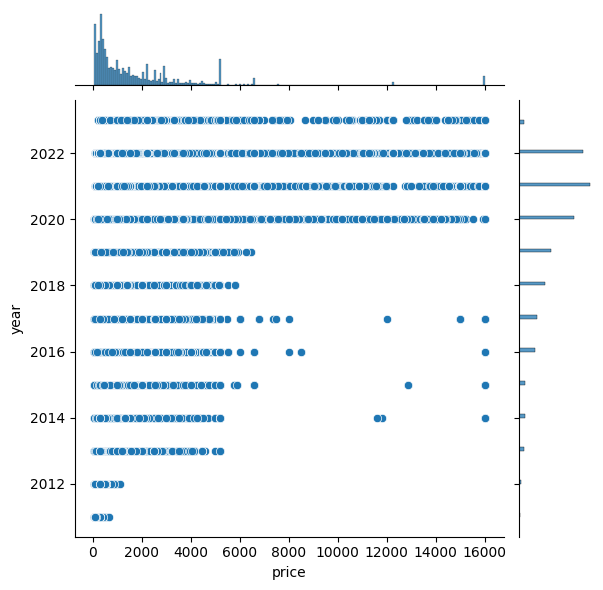

In [ ]:
sns.jointplot(x='price',y='year',data=df,kind='scatter')

<Figure size 2000x2000 with 0 Axes>

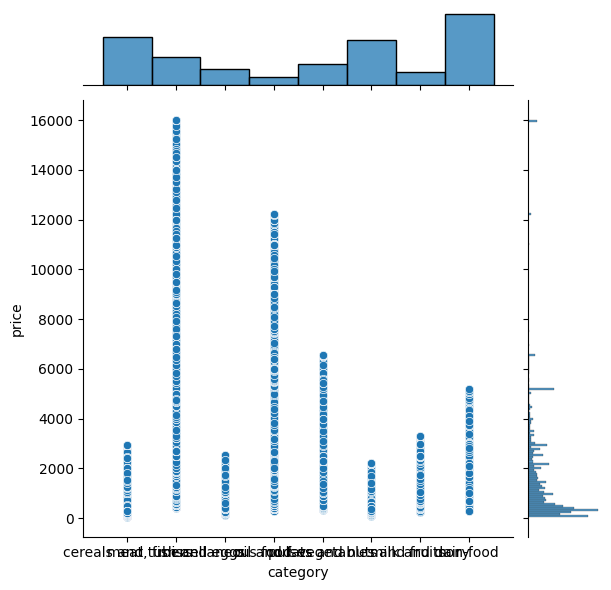

In [ ]:
plt.figure(figsize=(20,20))
sns.jointplot(x='category',y='price',data=df,kind='scatter')
plt.show()

<Axes: xlabel='price'>

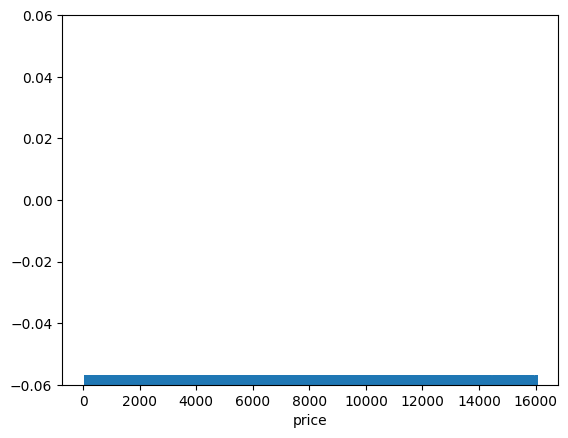

In [ ]:
sns.rugplot(df['price'])

In [ ]:
df1=df.corr()
print(df1)

           latitude  longitude     price      year     month
latitude   1.000000   0.509808 -0.015803 -0.013079  0.008690
longitude  0.509808   1.000000  0.011126  0.043058 -0.003197
price     -0.015803   0.011126  1.000000  0.364270  0.028666
year      -0.013079   0.043058  0.364270  1.000000 -0.054235
month      0.008690  -0.003197  0.028666 -0.054235  1.000000


<ipython-input-52-78a456a58081>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1=df.corr()


<Axes: >

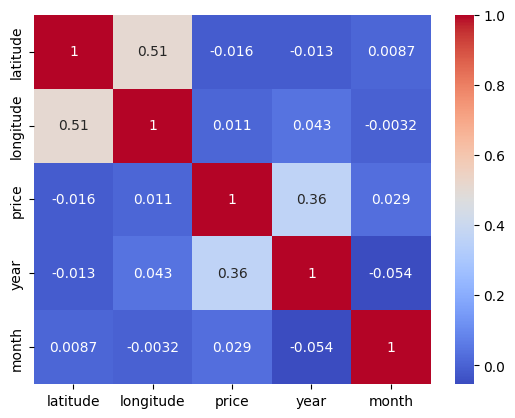

In [ ]:
sns.heatmap(df1,cmap='coolwarm',annot=True)

In [64]:
df = pd.get_dummies(df, columns = ['admin1', 'admin2','market','category','commodity','unit','pricetype','year','month'])
print(df)

         latitude  longitude     price  admin1_Al-Hasakeh  admin1_Aleppo  \
1       36.202778  37.158611    50.770                  0              1   
2       36.202778  37.158611    50.770                  0              1   
3       36.202778  37.158611    50.770                  0              1   
4       36.202778  37.158611    50.770                  0              1   
5       36.202778  37.158611    50.770                  0              1   
...           ...        ...       ...                ...            ...   
182773  34.890017  35.889063  2201.037                  0              0   
182775  34.890017  35.889063  1166.670                  0              0   
182776  34.890017  35.889063  2201.037                  0              0   
182777  34.890017  35.889063   383.330                  0              0   
182778  34.890017  35.889063  1400.000                  0              0   

        admin1_Ar-Raqqa  admin1_As-Sweida  admin1_Damascus  admin1_Dar'a  \
1          

In [65]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X=df.drop(labels='price',axis=1)
Y=df['price']

The test set must use identical scaling to the training set

    Fit the scaler using the training set, then apply the same scaler to transform the test set
    Do not scale the training and test sets using different scalers: this could lead to random skew in the data.
    Do not fit the scaler using any part of the test data: referencing the test data can lead to a form of data leakage.



In [66]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [67]:
Scalar1 = RobustScaler()
Scalar1.fit(X_train)
X_train=Scalar1.transform(X_train)
X_test=Scalar1.transform(X_test)

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train2 = pca.transform(X_train)
X_test2 = pca.transform(X_test)
cumsum = np.cumsum(pca.explained_variance_ratio_)


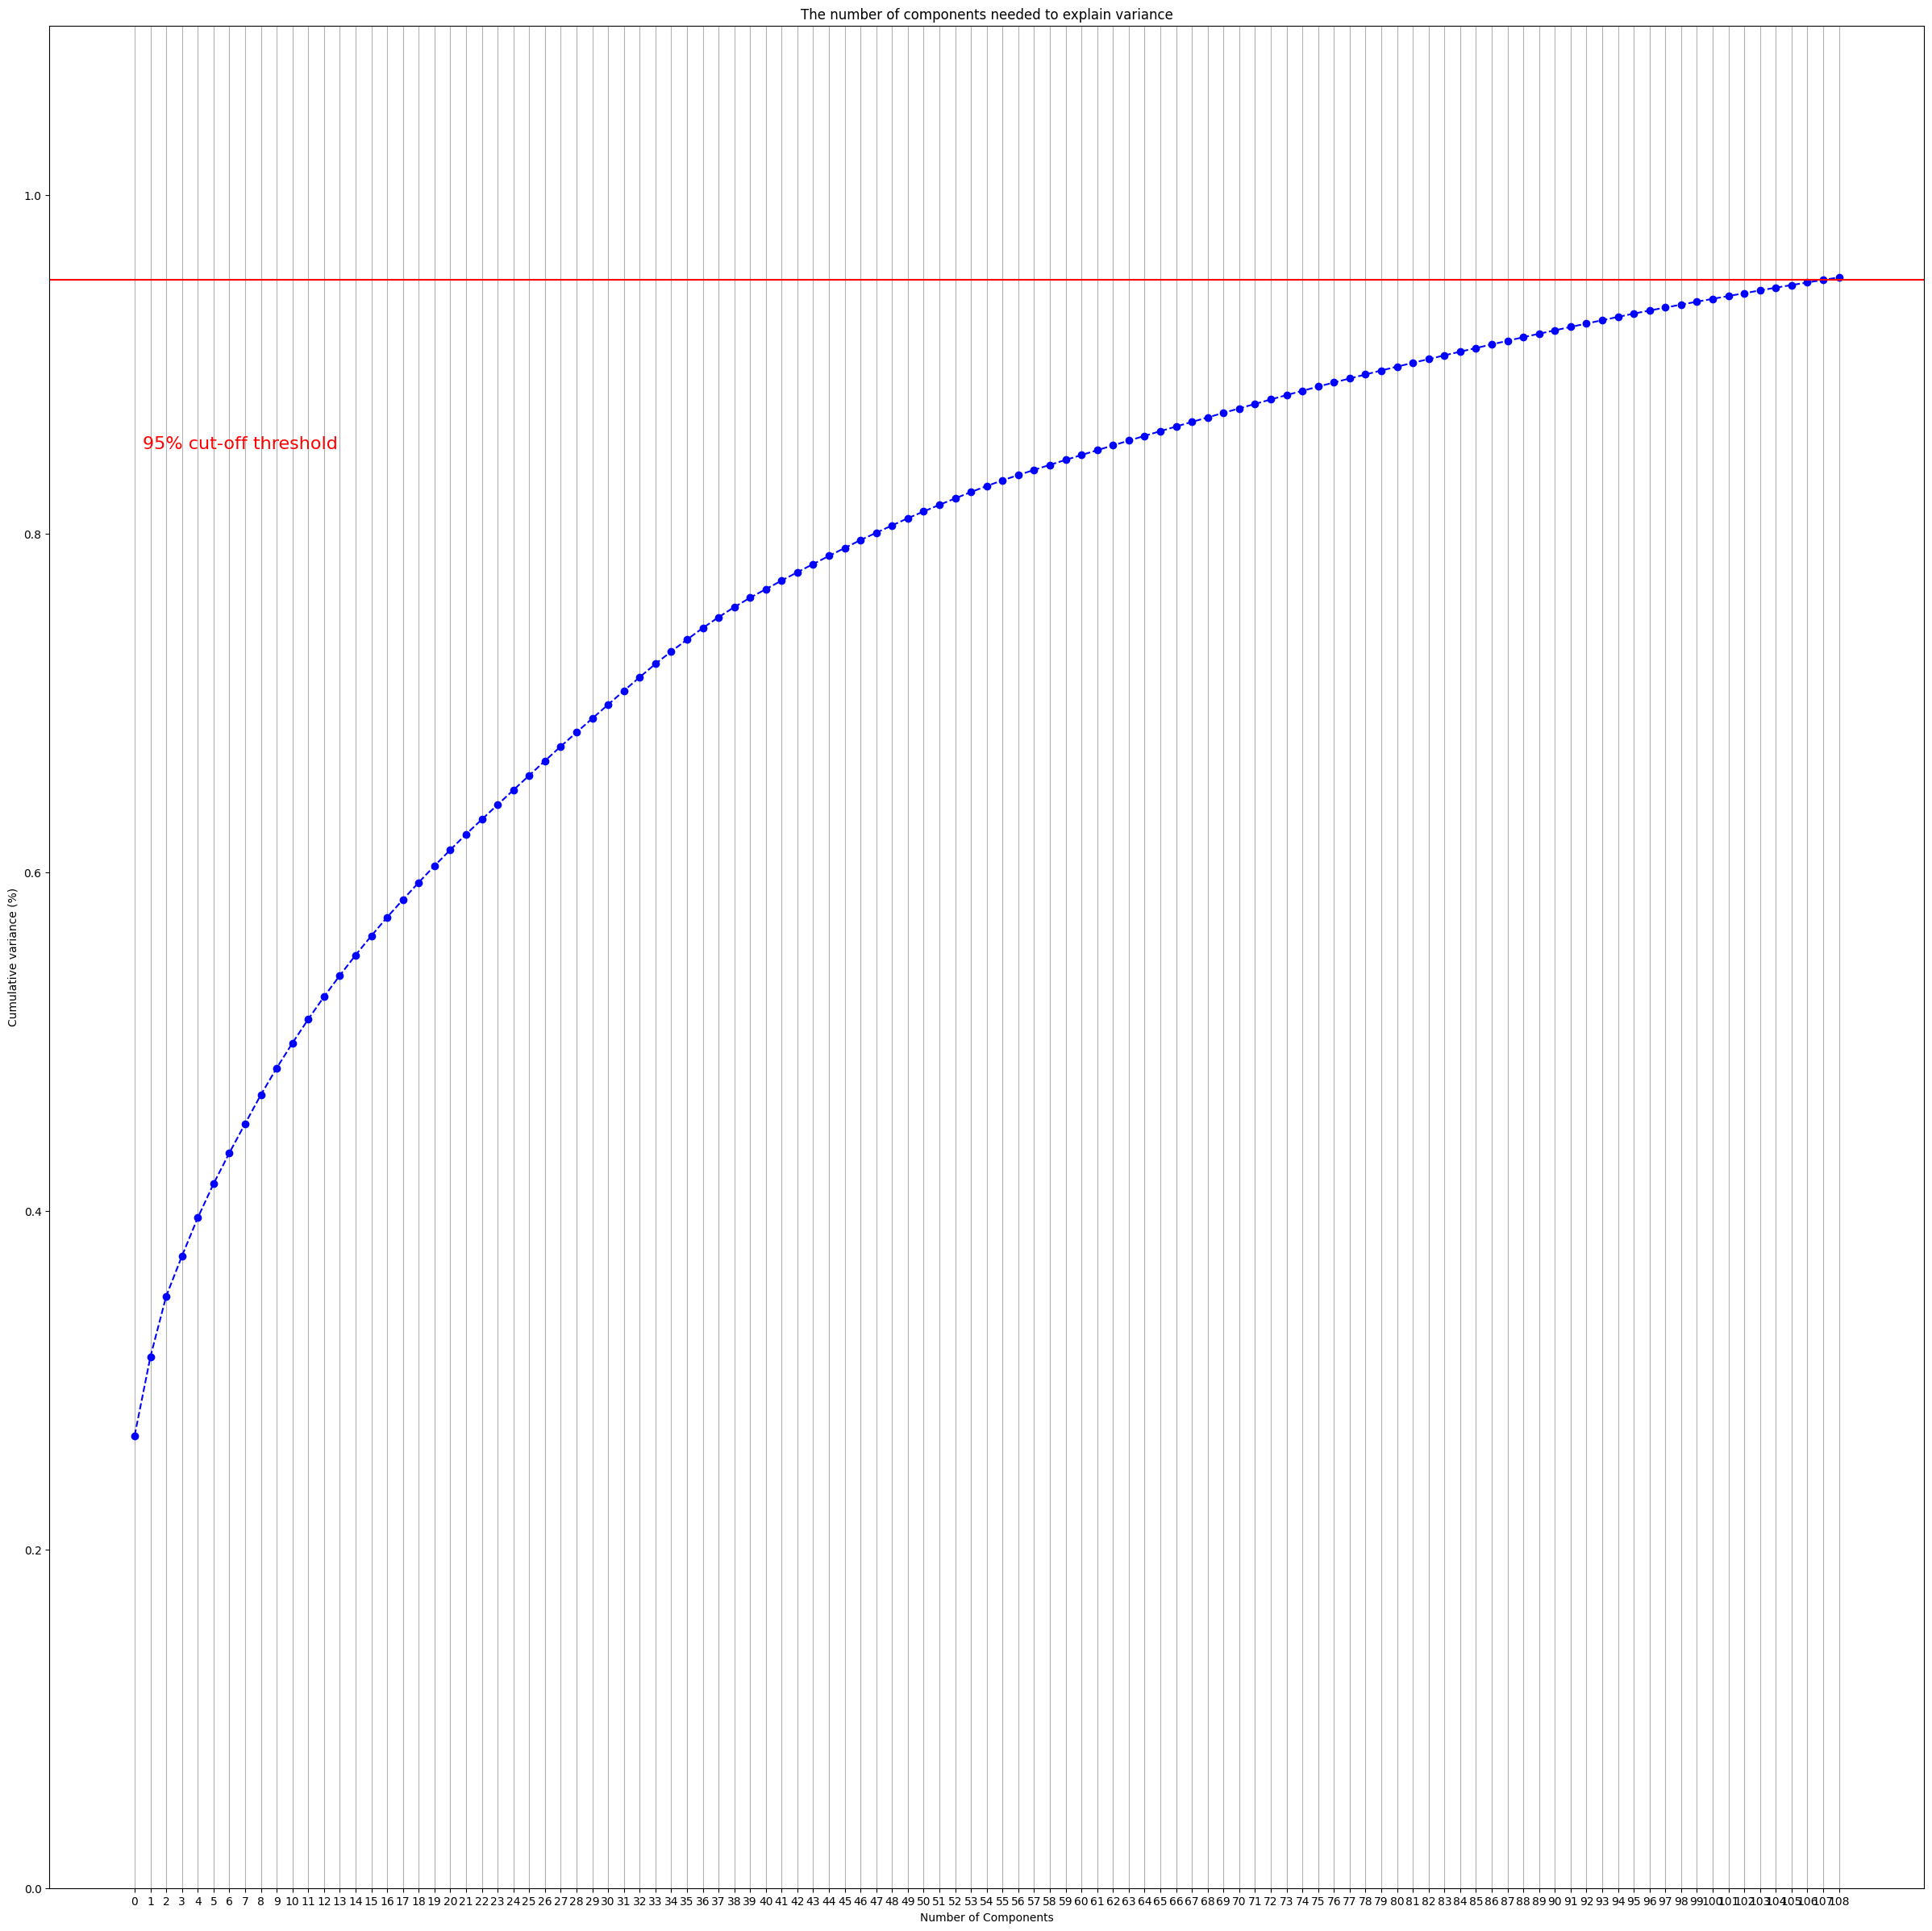

In [69]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,30)

fig, ax = plt.subplots()
xi = np.arange(0, len(cumsum), step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)

plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(cumsum), step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [70]:

pca = PCA(n_components=108)
pca.fit(X_train)
X_train2 = pca.transform(X_train)
X_test2 = pca.transform(X_test)

In [ ]:
X_train2.shape

(103903, 108)

In [ ]:
X_test2.shape

(51177, 108)

In [71]:
from sklearn.feature_selection import f_regression
fs=SelectKBest(score_func=f_regression,k=35)
fs.fit(X_train2,y_train)
X_train_fs=fs.transform(X_train2)
X_test_fs=fs.transform(X_test2)
print("X_train.shape: {}".format(X_train2.shape))
print("X_train_selected.shape: {}".format(X_train_fs.shape))
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
y_pred = model.predict(X_test_fs)
# evaluate predictions
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_preds)
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.2f' % mae)




X_train.shape: (103903, 108)
X_train_selected.shape: (103903, 35)
         Actual    Predicted
90284   1500.00   616.116718
170485  5200.00  3993.754720
127723  5200.00  3386.026836
132877  2511.67  1691.733242
27961    270.00   150.215840
...         ...          ...
34554   1317.00  1507.501603
145107  3682.80  3546.756992
126116   771.67   816.990596
131171   250.00   429.953599
132026  5200.00  3858.399187

[51177 rows x 2 columns]
MAE: 1129.45


In [72]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_pred)))
print('Accuracy on the training subset: {:.3f}'.format(model.score(X_train_fs, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(model.score(X_test_fs, y_test)))

r2_score (linear model): 0.62
Accuracy on the training subset: 0.622
Accuracy on the test subset: 0.622


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
regressor = DecisionTreeRegressor()
grid_param={ "max_depth":range(2,15,1),"min_samples_leaf":range(1,6,1),"min_samples_split":range(2,6,1)}
grid_search=GridSearchCV(estimator=regressor,param_grid=grid_param,refit=True,verbose=2)
grid_search.fit(X_train_fs, y_train)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   1.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   1.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   1.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   1.0s
[CV] END max_depth=2, min_samples_

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 15),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6)},
             verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=14,min_samples_leaf=2,min_samples_split=2)
regressor.fit(X_train_fs, y_train)
y_pred2 = regressor.predict(X_test_fs)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred2})
print(df)
mae = mean_absolute_error(y_test, y_pred2)
print('MAE: %.2f' % mae)

        Real Values  Predicted Values
90284       1500.00       1529.375816
170485      5200.00       5189.286014
127723      5200.00       5188.476028
132877      2511.67       1461.384688
27961        270.00        220.275902
...             ...               ...
34554       1317.00       1112.876417
145107      3682.80       5189.286014
126116       771.67       1210.645120
131171       250.00       1750.374365
132026      5200.00       5188.476028

[51177 rows x 2 columns]
MAE: 415.03


In [ ]:
print("r2_score (Decision Tree model): {:.2f}".format(r2_score(y_test, y_pred2)))
print('Accuracy on the training subset: {:.3f}'.format(regressor.score(X_train_fs, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(regressor.score(X_test_fs, y_test)))

r2_score (Decision Tree model): 0.92
Accuracy on the training subset: 0.946
Accuracy on the test subset: 0.923


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
random_regressor= RandomForestRegressor()
grid_param1={"n_estimators":[10],"max_depth":range(1,15,1)}
grid_search=GridSearchCV(estimator=random_regressor,param_grid=grid_param1,refit=True,verbose=2)
grid_search.fit(X_train_fs, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END .......................max_depth=1, n_estimators=10; total time=   5.1s
[CV] END .......................max_depth=1, n_estimators=10; total time=   6.5s
[CV] END .......................max_depth=1, n_estimators=10; total time=   3.4s
[CV] END .......................max_depth=1, n_estimators=10; total time=   3.4s
[CV] END .......................max_depth=1, n_estimators=10; total time=   4.5s
[CV] END .......................max_depth=2, n_estimators=10; total time=   7.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   7.9s
[CV] END .......................max_depth=2, n_estimators=10; total time=  16.2s
[CV] END .......................max_depth=2, n_estimators=10; total time=   7.4s
[CV] END .......................max_depth=2, n_estimators=10; total time=   7.8s
[CV] END .......................max_depth=3, n_estimators=10; total time=  10.2s
[CV] END .......................max_depth=3, n_e

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 15), 'n_estimators': [10]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 14, 'n_estimators': 10}

In [74]:
from sklearn.ensemble import RandomForestRegressor
random_regressor= RandomForestRegressor(n_estimators=10,max_depth=14)
random_regressor.fit(X_train_fs, y_train)
y_pred3 = random_regressor.predict(X_test_fs)

In [75]:
print("r2_score (random forest regressor model): {:.2f}".format(r2_score(y_test, y_pred3)))
print('Accuracy on the training subset: {:.3f}'.format(random_regressor.score(X_train_fs, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(random_regressor.score(X_test_fs, y_test)))

r2_score (random forest regressor model): 0.95
Accuracy on the training subset: 0.961
Accuracy on the test subset: 0.945


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
regressor = DecisionTreeRegressor()
grid_param={ "max_depth":range(2,15,1),"min_samples_leaf":range(1,6,1),"min_samples_split":range(2,6,1)}
grid_search=GridSearchCV(estimator=regressor,param_grid=grid_param,refit=True,verbose=2)
grid_search.fit(X_train_fs, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   1.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   1.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   1.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   1.1s
[CV] END max_depth=2, min_samples_l

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 11),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6)},
             verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=10,min_samples_leaf=2,min_samples_split=5)
regressor.fit(X_train_fs, y_train)
y_pred3 = regressor.predict(X_test_fs)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred3})
print(df)
mae = mean_absolute_error(y_test, y_pred3)
print('MAE: %.2f' % mae)

        Real Values  Predicted Values
90284       1500.00       1313.809432
170485      5200.00       5112.761343
127723      5200.00       5113.396735
132877      2511.67       2334.998296
27961        270.00        270.278181
...             ...               ...
34554       1317.00        672.243037
145107      3682.80       5112.761343
126116       771.67       1343.250276
131171       250.00       2334.998296
132026      5200.00       5113.396735

[51177 rows x 2 columns]
MAE: 572.34


In [ ]:
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_pred3)))
print('Accuracy on the training subset: {:.3f}'.format(regressor.score(X_train_fs, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(regressor.score(X_test_fs, y_test)))

r2_score (linear model): 0.87
Accuracy on the training subset: 0.889
Accuracy on the test subset: 0.873


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=100, learning_rate=1.0, random_state=42)
gbrt.fit(X_train_fs, y_train)
y_pred4 = gbrt.predict(X_test_fs)

errors = [mean_squared_error(y_test, y_pred4)
          for y_pred4 in gbrt.staged_predict(X_test_fs)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=3,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train_fs, y_train)

GradientBoostingRegressor(n_estimators=99, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt_best = GradientBoostingRegressor(max_depth=3 ,n_estimators=99, random_state=42)
gbrt_best.fit(X_train_fs, y_train)
y_pred4 = gbrt_best.predict(X_test_fs)

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred4})
print(df)
mae = mean_absolute_error(y_test, y_pred4)
print('MAE: %.2f' % mae)

        Real Values  Predicted Values
90284       1500.00        782.831023
170485      5200.00       4486.126384
127723      5200.00       4296.021631
132877      2511.67       1579.559780
27961        270.00        748.267084
...             ...               ...
34554       1317.00        964.953061
145107      3682.80       4143.472549
126116       771.67        913.804027
131171       250.00       1098.006535
132026      5200.00       3727.676922

[51177 rows x 2 columns]
MAE: 646.22


In [ ]:
print("r2_score (gradient boosting model model): {:.2f}".format(r2_score(y_test, y_pred4)))
print('Accuracy on the training subset: {:.3f}'.format(gbrt_best.score(X_train_fs, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(gbrt_best.score(X_test_fs, y_test)))

r2_score (gradient boosting model model): 0.85
Accuracy on the training subset: 0.855
Accuracy on the test subset: 0.854
